In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,32.502345269453031,31.70700584656992
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518
...,...,...
94,50.030174,81.536991
95,49.239765,72.111832
96,50.039576,85.232007
97,48.149859,66.224958


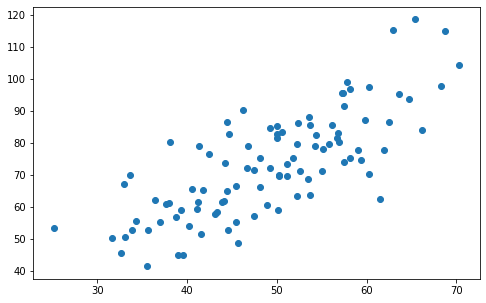

In [2]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 5.0)

# Preprocessing Input data
data = pd.read_csv('data.csv')
# data=pd.DataFrame([[-1,1/2],[1,-1],[2,-1/2],[3,2]])
X = data.iloc[:, 0].values  #all rows and 1st column
Y = data.iloc[:, 1].values   #all rows and 2nd column
plt.scatter(X, Y)
plt.show()

## Building the model

In [9]:
a_0 = 0
a_1 = 0

alpha = 0.0001  # The learning Rate
itr = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X
print(n)

99.0


## Using Gradient Descent 

In [10]:
for i in range(itr): 
    
    Y_pred = a_0 + a_1*X  # The current predicted value of Y
    
    D_a_0 = (-2/n) * sum(Y - Y_pred)  # Derivative wrt a_0
    
    D_a_1 = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt a_1
    
    a_0 = a_0 - alpha * D_a_0  # Update a_0
    
    a_1 = a_1 - alpha * D_a_1  # Update a_1

    #found linear regression line 
print (a_0, a_1)

0.10148121494753734 1.4796491688889395


## Making predictions

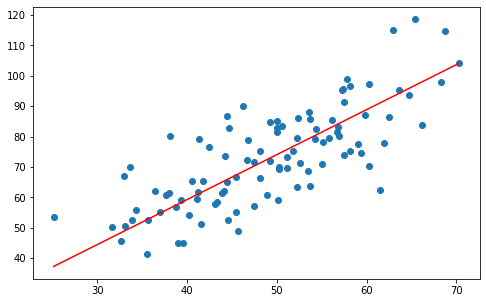

In [14]:
Y_pred = a_0 + a_1*X

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Using Least Squares

## Simplest eq
a_0 = ȳ - a_1*x̄

a_1 = Σ(x-x̄)(y-ȳ)/Σ((x-x̄)^2)

In [15]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0

for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2

#updating values of a1 and a0
a_1 = num / den
a_0 = Y_mean - a_1*X_mean

print (a_0, a_1)

9.90860619032653 1.2873573700109315


### Intermediate Eq
a_0 = ȳ - a_1*x̄

a_1 = (Σxy - (ΣyΣx)/n) / (Σx^2 - (Σx)^2/n) 

In [6]:
sumXY = 0
sumX = 0
sumY = 0
sumXsq = 0
n=len(X)
for i in range(len(X)):
    sumXY += X[i]*Y[i]
    sumY += Y[i]
    sumX += X[i]
    sumXsq += X[i]*X[i]

num = sumXY-(sumY*sumX)/n
den = sumXsq - (sumX*sumX)/n
a_1 = num / den
a_0 = Y_mean - a_1*X_mean

print (a_0, a_1)

9.908606190325983 1.2873573700109426


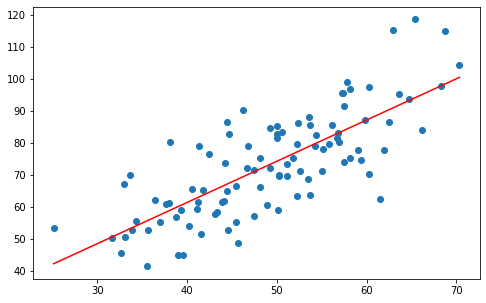

In [7]:
# Making predictions
Y_pred = a_0 + a_1*X

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Using sklearn library

LinearRegression method uses least square method

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
linearR = LinearRegression()
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)
linearR.fit(X, Y)

LinearRegression()

In [10]:
linearR.coef_

array([[1.28735737]])

In [11]:
linearR.intercept_

array([9.90860619])

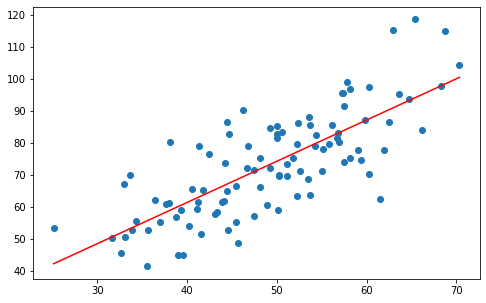

In [19]:
# Making predictions
Y_pred = linearR.predict(X)

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].values

In [15]:
SGDR = SGDRegressor(learning_rate='constant',eta0=alpha)
X=X.reshape(-1, 1)
SGDR.fit(X, Y)

SGDRegressor(eta0=0.0001, learning_rate='constant')

In [16]:
SGDR.coef_

array([1.381332])

In [17]:
SGDR.intercept_

array([0.05928177])

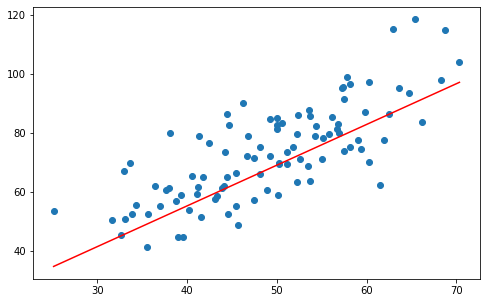

In [18]:
# Making predictions
Y_pred = SGDR.predict(X)

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 0].values
Y = data.iloc[:, 1].gt(60).astype(int)
X=X.reshape(-1, 1)

In [25]:
LogisticR=LogisticRegression(solver='liblinear', random_state=0)    #liblinear is best for small datasets
LogisticR.fit(X,Y)

LogisticRegression(random_state=0, solver='liblinear')

In [26]:
LogisticR.intercept_

array([-2.45894291])

In [27]:
LogisticR.coef_

array([[0.08069485]])

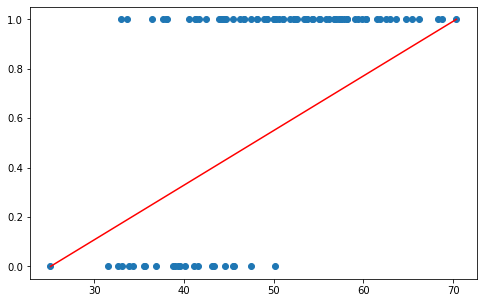

In [28]:
# Making predictions
Y_pred = LogisticR.predict(X)

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()